In [46]:
import numpy as np
import cse
import matplotlib.pyplot as plt
from scipy.special import hermite
import scipy.constants as const

def phi(v, R, alpha):
    y = R*np.sqrt(alpha)
    Nv = ((alpha/np.pi)**0.25)/np.sqrt(2**v*np.math.factorial(v))
    Hv = hermite(v)
    sum = 0.0
    for i, h in enumerate(Hv.coeffs[::-1]):
        sum += h*(y**i)
    return (-1)**v*sum*Nv*np.exp(-y**2/2)


In [49]:
μ = 2
ω = 1/3 #in eV
R = np.linspace(-2, 2, 2001)
# quadratic PEC
V = (1/2)*μ*const.u*(ω*R)**2

X = cse.Cse(μ, VT=[(R, V)])


 v   E(v) [cm-1] | [eV]
-1         80.66 |  0.0100


ValueError: factorial() not defined for negative values

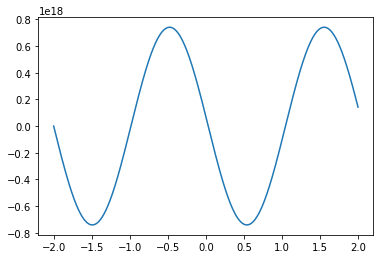

In [50]:
fig, ax = plt.subplots()

print(" v   E(v) [cm-1] | [eV]")
for en in [0.01, 0.1, 0.16]:  # guess energies in eV
    X.solve(en)
    wf = X.wavefunction[:, 0, 0]
    if X.vib % 2:
        wf = -wf
    print(f'{X.vib:2d}      {X.cm:8.2f} |{X.cm/8065.541:8.4f}')
    ax.plot(R, wf*300 + X.cm, label=fr'$v={X.vib:d}$')
    ax.plot(R, phi(X.vib, R, μ*const.u*ω/const.hbar)*300 + X.cm, 'k--')

ax.plot(np.NaN, np.NaN, 'k--', label=r'analytical')
ax.plot(R, V*8065.541)
ax.axis(xmin=-2, xmax=2, ymin=-10, ymax=2000)
ax.legend()
ax.set_title(r'Harmonic oscillator potential:'
             r' $\psi_v(x) = N_v H_v(x) e^{-x^2/2}$')
ax.set_ylabel(r'potential energy (cm$^{-1}$) / wavefunction $\times 400$')
ax.set_xlabel(r'$x$')

plt.show()
X


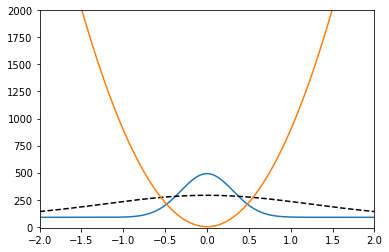

In [44]:
fig, p = plt.subplots()

#X.solve(0)
wf = X.wavefunction[:, 0, 0]
p.plot(R, wf*300 + X.cm, label=fr'$v={X.vib:d}$')

p.plot(R, phi(0, R, μ*ω)*300 + 86.91, 'k--')
p.plot(R, V*8065.541)

p.axis(xmin=-2, xmax=2, ymin=-10, ymax=2000)
plt.show()

In [41]:
X.wavefunction.shape

(2001, 1, 1)